In [14]:
from dataclasses import dataclass

import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import TargetEncoder, StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error as RMSE 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
# filter warnings
warnings.filterwarnings('ignore')

In [15]:
df = pd.read_csv('./Module_2_Lecture_2_Class_penguins.csv')

df.sample(5, random_state=42)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
194,Gentoo,Biscoe,45.3,13.7,210.0,4300.0,female
157,Gentoo,Biscoe,46.5,13.5,210.0,4550.0,female
225,Gentoo,Biscoe,46.5,14.8,217.0,5200.0,female
208,Gentoo,Biscoe,43.8,13.9,208.0,4300.0,female
318,Chinstrap,Dream,50.9,19.1,196.0,3550.0,male


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


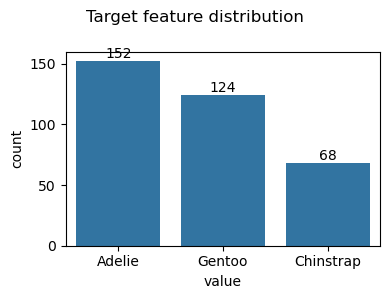

In [17]:
plt.figure(figsize=(4,3))
ax = sns.countplot(data=df, x='species')
for i in ax.containers:
    ax.bar_label(i)
    ax.set_xlabel("value")
    ax.set_ylabel("count")
            
plt.suptitle("Target feature distribution")

plt.tight_layout()
plt.show()

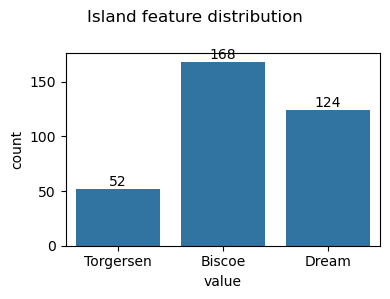

In [18]:
plt.figure(figsize=(4,3))
ax = sns.countplot(data=df, x='island')
for i in ax.containers:
    ax.bar_label(i)
    ax.set_xlabel("value")
    ax.set_ylabel("count")
            
plt.suptitle("Island feature distribution")

plt.tight_layout()
plt.show()

<Figure size 600x600 with 0 Axes>

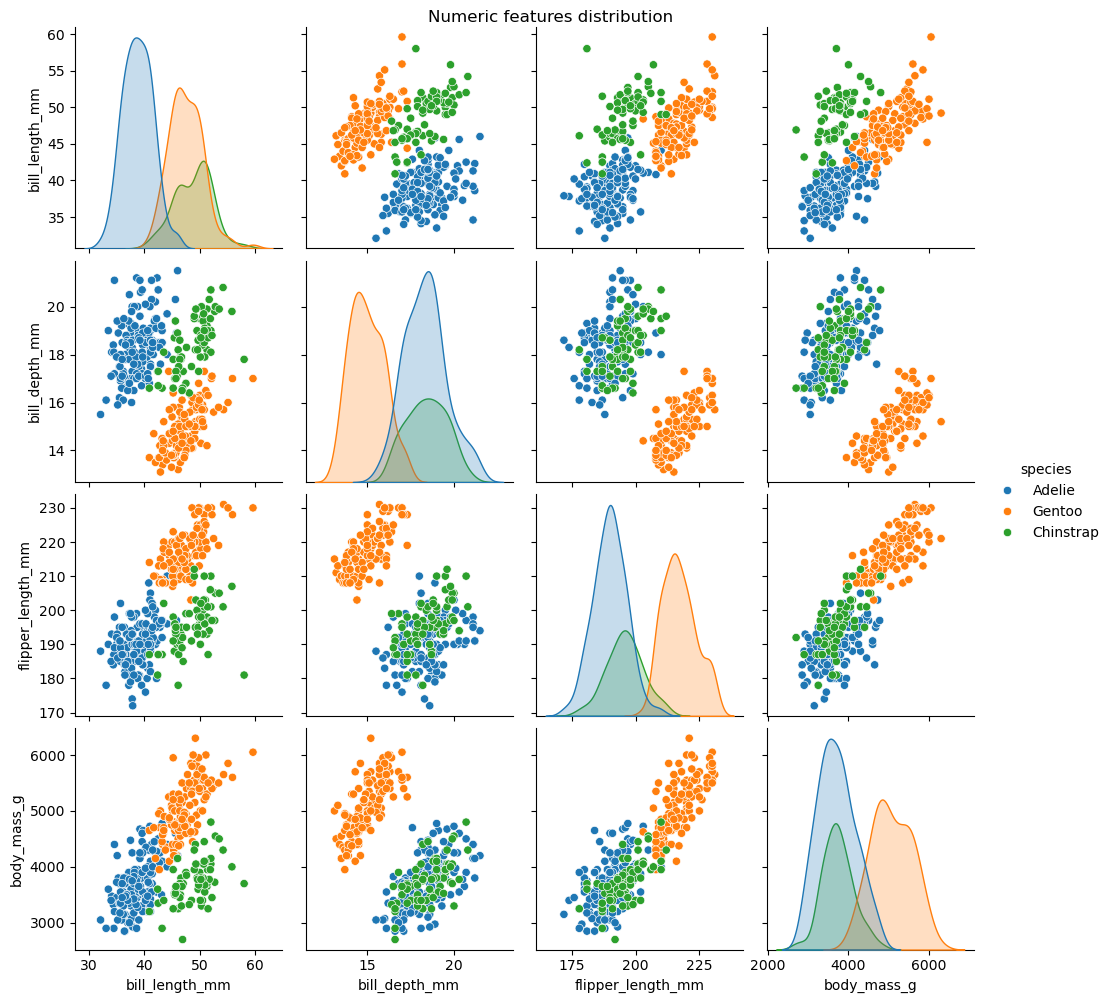

In [19]:
plt.figure(figsize=(6,6))
sns.pairplot(data=df, hue='species').figure.suptitle('Numeric features distribution', y=1)
plt.show()

In [20]:
features = ['species', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

df = df.loc[:, features]

In [21]:
df.loc[df['species']=='Adelie', 'species']=0
df.loc[df['species']=='Gentoo', 'species']=1
df.loc[df['species']=='Chinstrap', 'species']=2
df = df.apply(pd.to_numeric)

df.head(2)

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,0,39.1,18.7,181.0,3750.0
1,0,39.5,17.4,186.0,3800.0


In [22]:
cuda = torch.cuda.is_available()
print(cuda)

False
